### 2乗和誤差 (mean squared error)
$$ E = \frac {1}{2} \sum_{k} (y_k - t_k)^2$$

- $ y_k $はニューラルネットワークの出力
- $ t_k $は教師データ
- $ k $は データの次元数 

In [6]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0,0.05,0.1,0.0,0.1,0.0,0.0] # ニューラルネットワークの出力(ソフトマックス関数の出力なので確率)
t = [0,0,1,0,0,0,0,0,0,0] # 教師データ(正解となるラベルを1、それ以外を0とする)

# 2乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 例1
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [7]:
# 7の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0,0.05,0.1,0.0,0.6,0.0,0.0]
# 例2
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

一つ目の結例の損失関数の方が小さくなっており、教師データとの誤差が小さいことがわかります。
つまり、一つ目の例のほうが、出漁結果が教師データにより適合していることを2乗和誤差は示しているのです。

### 交互エントロピー誤差(cross entropy error)
$$ E = \sum_{k} t_k \log y_k $$

- $ \log $は底が e の自然対数( $\log e$ ) を表します
- $ y_k$ はニューラルネットワークの出力 
- $ t_k$ は正解ラベル（正解となるインデックスだけが1でその他は0）

In [8]:
import numpy as np

# エントロピー誤差の実装
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [9]:
y = [0.1, 0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

### 交互エントロピー誤差のすべての損失関数の和
$$ E = -\frac{1}{N}\sum_{n} \sum_{k} t_{nk} \log y_{nk} $$

### ミニバッチ学習
訓練データあからある枚数だけを選び出し、その小さな塊（ミニバッチ）毎に学習を行う手法

In [10]:
# 訓練データの中から指定された個数のデータをランダムに選び出す
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10) # 0〜60000未満の数字の中からランダムに10個の数字を選ぶ

array([33294, 10206,  1308, 12950,  1743, 18305, 44335, 42582,  2401, 11484])

In [12]:
# バッチ対応版交互エントロピー誤差の実装
# y はニューラルネットワークの出力
# t は教師データ
def cross_entropy_error(y, t): 
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return  -np.sum(t * np.log(y)) / batch_size

In [13]:
# 教師データがラベルとして与えられたときの交互エントロピー誤差の実装
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 数値微分
微分とはある瞬間の変換の量を表したもの
$$ \frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x + h) - f(x)}{h} $$

In [22]:
def numerical_diff(f, x):
    h = 1e-4 #0.001
    return (f(x+h) - f(x-h)) / (2*h)

### 数値微分の例
$$ y = 0.01x^2 + 0.1x $$

In [23]:
# ↑の式はpythonで書くとこうなる
def function_1(x):
    return 0.01*x**2 + 0.1*x

0.1999999999990898


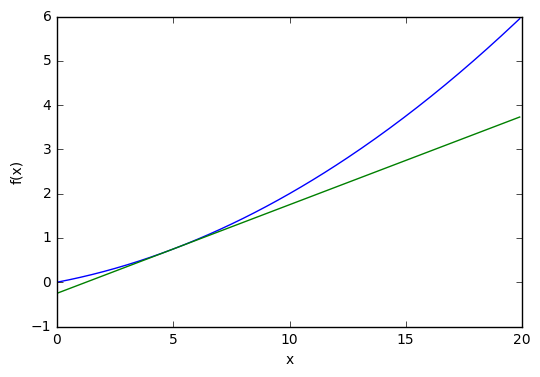

In [32]:
# グラフを描画する
import numpy as np
import matplotlib.pylab as plt

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [28]:
# この関数の微分を、x=5とx=10のときで、それぞれ計算してみる
numerical_diff(function_1, 5)

0.1999999999990898

In [29]:
numerical_diff(function_1, 10)

0.2999999999986347